# Alarming Decrease in Water Level in the Great Salt Lake

This is the draft project results assignment which includes the research question, introduction, description of study site, description of data sets, loading and initial plotting of raw data, and significant improvements on results and the discussion/conclusion.

@author = Kaylee Molan for ESCI 7/896.02  
@date = 2023-04-13 
@license = MIT -- https://opensource.org/licenses/MIT

 ## Research Question:
What is the theoretical date that the Great Salt Lake be completely dry if no drastic preventative measures are taken?

## Introduction 
The Great Salt Lake is a remnant of Lake Bonneville and is the largest salt water lake in the Western Hemisphere. It is important to note that this lake is unique in the fact that it does not have any outlets, so this water is either evaporated or utilized by the public. Also, there are only 3 major rivers that contribute heavy flows  into the Great Salt Lake. 

Knowing when the lake will be completely dried up is critically important as this lake serves many important purposes. It acts as a home to a variety of plants and animals, is a large economic resource for Utah, provides water for agriculture and other activities, and even acts as a recreational pursuit for the community. As the lake dries up, there are many negative consequences that will come about in relation to the ecosystem currently prevalent in this area, job losses and decreased economic growth, exacerbation of water shortages, etc. Continually, knowing when the lake will be completely dry is important as there are some concerns about the air surrounding Salt Lake City becoming poisonous since the bed of the Great Salt Lake holds high levels of dangerous particles like arsenic, antimony, copper, zirconium, and various heavy metals.

## Description of Study Site 
The Great Salt Lake watershed is a large, complex ecosystem located in northern Utah, in the western United States. The watershed covers an area of approximately 22,000 square miles, including the Great Salt Lake, which is the largest saltwater lake in the Western Hemisphere. The watershed is home to a diverse range of flora and fauna, including numerous migratory birds, fish species, and wetland plants. The area is also important for its unique geological features, including the surrounding mountains and the salt flats that surround the lake. The watershed is fed by numerous streams and rivers, with the Bear, Jordan, and Weber rivers providing the greatest flow into the lake. The lake itself has no outlet, so water leaves the system through evaporation, leaving behind a highly concentrated salt solution.

## Description of Data Sets

GSL-precip: 
This dataset is from NOAA Climate at a Glance for Salt Lake City, Utah and contains the annual precipitation (in inches) from the year 1948 to 2022.
Link: https://www.ncei.noaa.gov/access/monitoring/climate-at-a-glance/city/time-series/USW00024127/pcp/ann/1/1895-2023?base_prd=true&begbaseyear=1895&endbaseyear=2020

GSL-waterlevel:
This dataset is from USGS Site 10010100 and contains the annual water surface elevation (in feet) of the Great Salt Lake in Salt Lake City, Utah from the year 1990 to 2022. 
Link: https://waterdata.usgs.gov/nwis/annual?site_no=10010100&agency_cd=USGS&por_10010100_178324=448793,62614,178324,1966,2023&year_type=W&referred_module=sw&format=rdb

BearRiver-Q:
This dataset is from USGS  10126000 and contains the annual discharge (in cubic feet per second) of the Bear River, an inlet to the Great Salt Lake in Salt Lake City, Utah from the year 1950 to 2022. 

JordanRiver-Q:
This dataset is from USGS 10171000 and contains the annual discharge (in cubic feet per second) of the Jordan River, an inlet to the Great Salt Lake in Salt Lake City, Utah from the year 1944 to 2022. 

WeberRiver-Q:
This dataset is from USGS 10136500 and contains the annual discharge (in cubic feet per second) of the Weber River, an inlet to the Great Salt Lake in Salt Lake City, Utah from the year 1921 to 2022. 
Links for the rivers: https://dashboard.waterdata.usgs.gov/app/nwd/en/?region=lower48&aoi=default 


### Load and initial plot of raw data 

In [1]:
import os
import pandas as pd
from datetime import datetime, timedelta
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
#%% Specify parameters 
# Primary and secondary precipitation data (with extension)
infile_names = 'GSL-precip.csv', 'GSL-waterlevel.csv', 'WeberRiver-Q.csv', 'JordanRiver-Q.csv', 'BearRiver-Q.csv'

# Text for figure title
fig_title = "Great Salt Lake, Utah"

old_SA= 2300
old_elevation= 4211.85
current_SA= 950

In [2]:
#%% Load and examine data
os.chdir("/Users/kayleemolan/Desktop/Hydrodata Analysis/Project")

#Precipitation data
datap=pd.read_csv(infile_names[0],parse_dates=['Date'], 
                 index_col=['Date'], skiprows=4)
datap.index=pd.to_datetime(datap.index, format='%Y12')
datap.drop(columns = {"Anomaly"},inplace = True)
datap=datap.rename(columns={"Value":"Precipitation (in/year)"})

#Water level data
dataw=pd.read_csv(infile_names[1], comment="#", delimiter="\t", header=1,
                  parse_dates=['4s'],index_col=['4s'])
dataw.drop(columns = {"15s", "5s.1", "5s", "3n"},inplace = True)
dataw=dataw.rename(columns={"12n":"Water Level (feet)"})
dataw = dataw.rename_axis('Date')

#Discharge data
#Weber River
dataqw=pd.read_csv(infile_names[2], comment="#", delimiter="\t", header=1,
                  parse_dates=['4s'],index_col=['4s'])
dataqw.drop(columns = {"15s", "5s.1", "5s", "3n"},inplace = True)
dataqw=dataqw.rename(columns={"12n":"Weber Discharge (cfs)"})
dataqw = dataqw.rename_axis('Date')

#Jordan River
dataqj=pd.read_csv(infile_names[3], comment="#", delimiter="\t", header=1,
                  parse_dates=['4s'],index_col=['4s'])
dataqj.drop(columns = {"15s", "5s.1", "5s", "3n"},inplace = True)
dataqj=dataqj.rename(columns={"12n":"Jordan Discharge (cfs)"})
dataqj = dataqj.rename_axis('Date')

#Bear River
dataqb=pd.read_csv(infile_names[4], comment="#", delimiter="\t", header=1,
                  parse_dates=['4s'],index_col=['4s'])
dataqb.drop(columns = {"15s", "5s.1", "5s", "3n"},inplace = True)
dataqb=dataqb.rename(columns={"12n":"Bear Discharge (cfs)"})
dataqb = dataqb.rename_axis('Date')

In [3]:
#%% Merge all data frames into one singular data frame

#Merged based on index columns
merged_df = pd.merge(dataqw,dataqb,left_index=True, right_index=True)
merged_df = pd.merge(merged_df, dataqj, left_index=True, right_index=True)
merged_df = pd.merge(merged_df, dataw, left_index=True, right_index=True)
merged_df = pd.merge(merged_df, datap, left_index=True, right_index=True)
data= merged_df

Text(0.5, 1.0, 'Great Salt Lake, Utah')

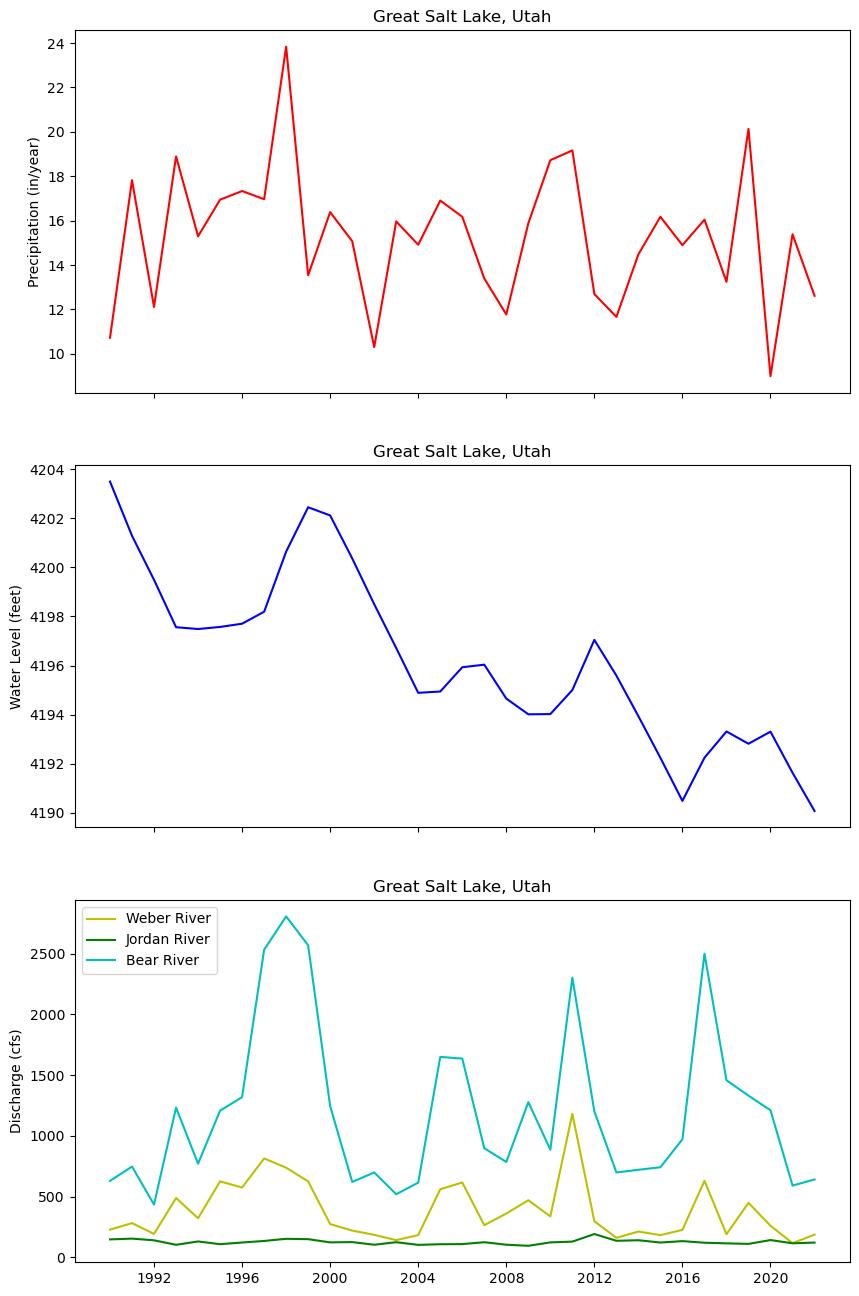

In [4]:
#%%Figure 1

#Plot raw data w/ 3 subpanels (precipitation, water level, discharge)
#Create plot to display data
fig, (ax1,ax2,ax3)= plt.subplots(3,1,figsize=(10,16), sharex=True)

#Plot precipitation
ax1.plot(data['Precipitation (in/year)'],'r-', label='Annual Precipitation')
ax1.set_ylabel('Precipitation (in/year)')
ax1.set_title(fig_title)

#Plot integrated soil moisture content
ax2.plot(data['Water Level (feet)'], 'b-', label= 'Water Level')
ax2.set_ylabel('Water Level (feet)')
ax2.set_title(fig_title)

#Plot precipitation over entire period of study
ax3.plot(data['Weber Discharge (cfs)'], 'y-', label= 'Weber River')
ax3.plot(data['Jordan Discharge (cfs)'], 'g-', label= 'Jordan River')
ax3.plot(data['Bear Discharge (cfs)'], 'c-', label= 'Bear River')
ax3.legend()
ax3.set_ylabel('Discharge (cfs)')
ax3.set_title(fig_title)

Text(0.5, 1.0, 'Great Salt Lake, Utah')

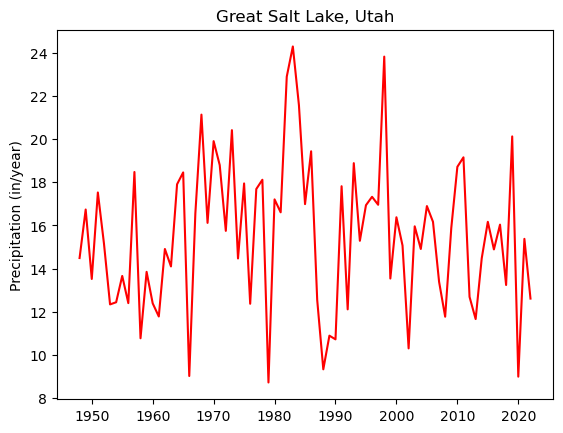

In [5]:
### Additional planned analyses

#%% Additional plotting
#Plot precipitation over the entire available study period to see if drought is a driving variable (Figure 2)
fig, ax1= plt.subplots()

ax1.plot(datap['Precipitation (in/year)'],'r-', label='Annual Precipitation')
ax1.set_ylabel('Precipitation (in/year)')
ax1.set_title(fig_title)

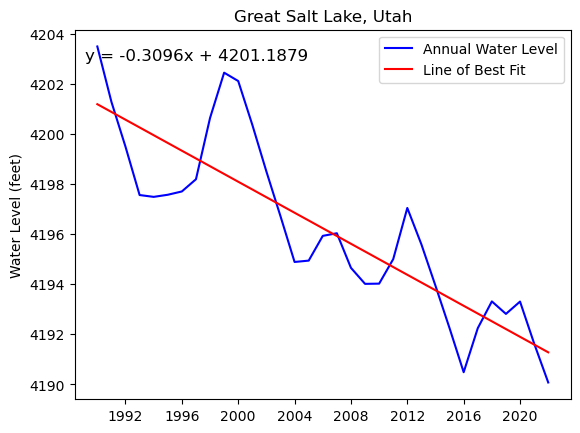

In [6]:
#Plot water level over entire available study period (only shows 1990 onward) (Figure 3)
fig, ax1= plt.subplots()

ax1.plot(dataw['Water Level (feet)'],'b-', label='Annual Water Level')
ax1.set_ylabel('Water Level (feet)')
ax1.set_title(fig_title)
#Create line of best fit
x = np.arange(len(dataw['Water Level (feet)']))
coef = np.polyfit(x, dataw['Water Level (feet)'], 1)
line = coef[0] * x + coef[1]
#Plot the line of best fit
ax1.plot(dataw.index, line, 'r-', label='Line of Best Fit')
eqn = f'y = {coef[0]:.4f}x + {coef[1]:.4f}'
ax1.text(0.02, 0.95, eqn, transform=ax1.transAxes, fontsize=12, verticalalignment='top')
#Add the legend and show the plot
ax1.legend()
plt.show()

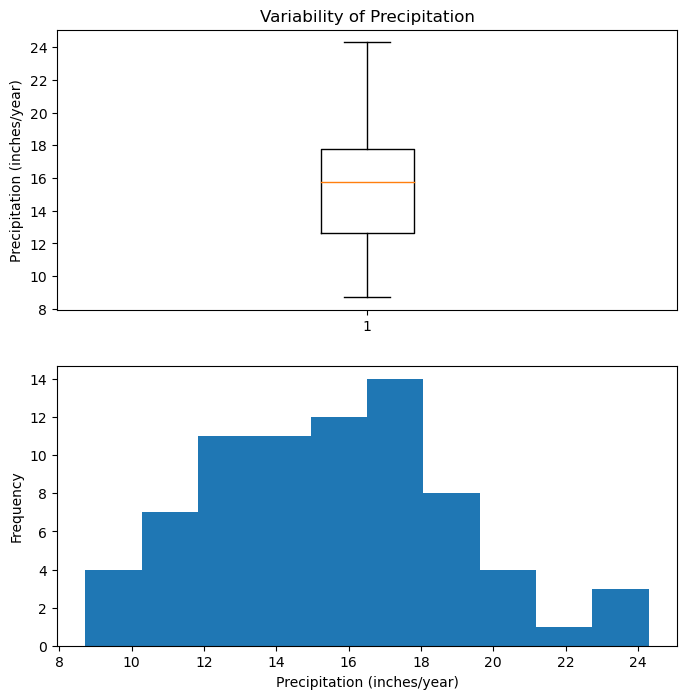

In [7]:
#Create a figure with two subplots for the histogram and box plot for precipitation (Figure 4)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))

#Plot the box plot
ax1.boxplot(datap['Precipitation (in/year)'])
ax1.set_ylabel('Precipitation (inches/year)')
ax1.set_title('Variability of Precipitation')
#Plot the histogram
ax2.hist(datap['Precipitation (in/year)'], bins=10)
ax2.set_xlabel('Precipitation (inches/year)')
ax2.set_ylabel('Frequency')
#Show plots
plt.show()

In [8]:
#%% Find evaporation over the last 20 years assuming change in storage is negligible 
oldcs= 0
evap= ((datap['Precipitation (in/year)'].loc['1966-01-01':'1986-01-01'].mean()/12 +(dataqb['Bear Discharge (cfs)'].loc['1966-01-01':'1986-01-01'].mean()+ dataqw['Weber Discharge (cfs)'].loc['1966-01-01':'1986-01-01'].mean() + dataqj['Jordan Discharge (cfs)'].loc['1966-01-01':'1986-01-01'].mean())/(old_SA*2.788e7))-oldcs)

#Mass balance of lake currently based from 1990 to 2022
newcs= ((datap['Precipitation (in/year)'].loc['1990-01-01':'2022-01-01'].mean()/12) +(dataqb['Bear Discharge (cfs)'].loc['1990-01-01':'2022-01-01'].mean()+ dataqw['Weber Discharge (cfs)'].loc['1990-01-01':'2022-01-01'].mean() + dataqj['Jordan Discharge (cfs)'].loc['1990-01-01':'2022-01-01'].mean())/(current_SA*2.788e7))-evap
print(f"The current change in storage of the Great Salt Lake is {newcs}")

The current change in storage of the Great Salt Lake is -0.1791233598789994


In [9]:
#%% Lake dry up date
# Extrapolate data to estimate the theoretical date the lake will dry up
days_to_dry = data['Water Level (feet)'].iloc[-1]  / -newcs
dry_date = data.index[-1] + timedelta(days=days_to_dry)

# Print date to screen
print(f"The theoretical dry-up date of the Great Salt Lake is {dry_date}")

The theoretical dry-up date of the Great Salt Lake is 2086-01-17 03:15:52.779671


### Results

Important note: I plan on focusing on my figures and improving how to visualize the main reason for the decrease in water level as I feel it has not been shown in the best way. I think focusing on the discharge is important at this time.

I was not sure how to provide my input data and output data in tables in here but I will plan on going to office hours to figure this out as soon as possible. 



### Discussion/conclusion


The study revealed that the theoretical dry-up date of the Great Salt Lake is January 17, 2086. This implies that the lake will not longer be in existence to act as a water source by this date. It is important to note that this is assuming no preventative measures are taken whatsoever, it assumes loss in storage will continue to drastically decrease over time. Figure 1 displays precipitation, discharge from the rivers, and water level over time. Here the relationship between these can be interpreted. It can be seen that discharge, precipitation, and water level all have a direct relationship. The more precipitation results in a higher discharge in the contributing rivers, and therefore an increase in water level. This can be seen as the peaks of each correspond to one another. Figure 2 displays the precipitation over time and provides a better visualize into the variability of precipitation over time, which can also been seen in Figures 3 and 4. This shows that precipitation is not drastically changing over time and is not the major driver in the decrease in water level of the Great Salt Lake. This suprised me as I thought drought may have played a role in the drying up of the Great Salt Lake, due to how the West is experiencing more severe changes in weather due to climate change. This revealation leaves the major contributor as either a decrease in discharge in the contributing rivers, or some other unknown source. 

Consider the results in the context of previous work at other sites and/or produced by other analytical techniques:

Consider ways to reduce errors or improve method:

Discuss whether the data support the hypothesis and the expectations described in the introduction:

Explain conclusions that can be made from these results and the significance of these conclusions to other scientists or watershed managers: 
